# Author: Hemant
# The Sparks Foundation
# Prediction using Decision Tree Algorithm
# Objective: Create the Decision Tree classifier and visualize it graphically.

# Importing the necessary Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the Data File

In [2]:
df = pd.read_csv('iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
df.drop(columns = 'Id', inplace = True)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Data Visualization 

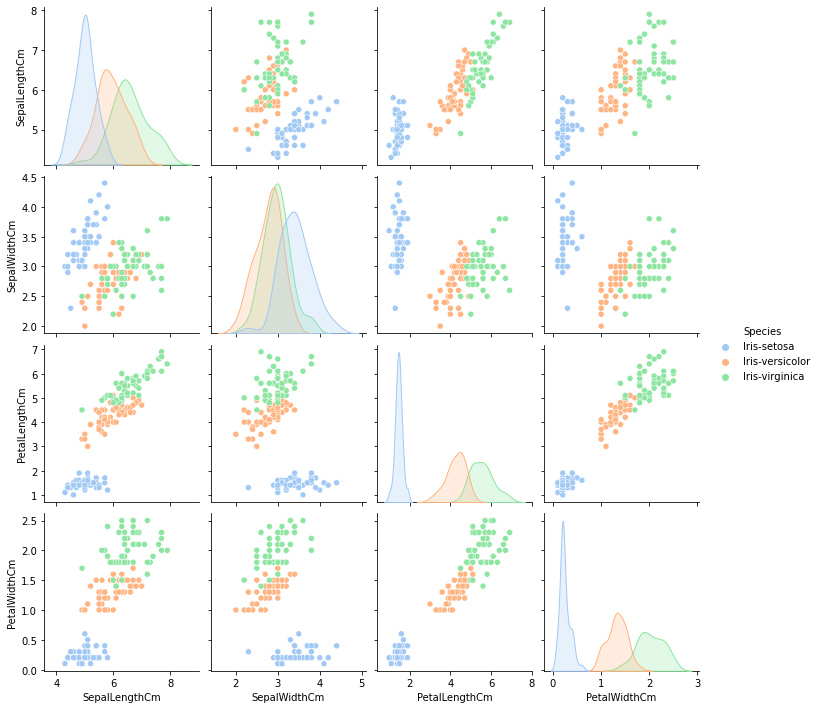

In [8]:
sns.pairplot(df, hue = 'Species', palette = 'pastel')

In [9]:
# Label encoding the textual data to numerical data
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

In [10]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Splitting the data for training and testing

In [11]:
X = df.drop('Species', axis = 1)
Y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2, stratify = Y)

# Model tarining and prediction

In [12]:
# Importing the model
model = tree.DecisionTreeClassifier()

In [13]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [14]:
# Preidction using the trained model
pred = model.predict(x_test)

In [15]:
# Classification report, Confusion matrix and Accurcay of the model
print('CLASSIFICATION REPORT :\n',classification_report(y_test, pred))
print('CONFUSION MATRIX :\n',confusion_matrix(y_test, pred))
print('ACCURACY SCORE :',accuracy_score(y_test, pred))

CLASSIFICATION REPORT :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

CONFUSION MATRIX :
 [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]
ACCURACY SCORE : 0.9666666666666667


# Visualising the Decision Tree

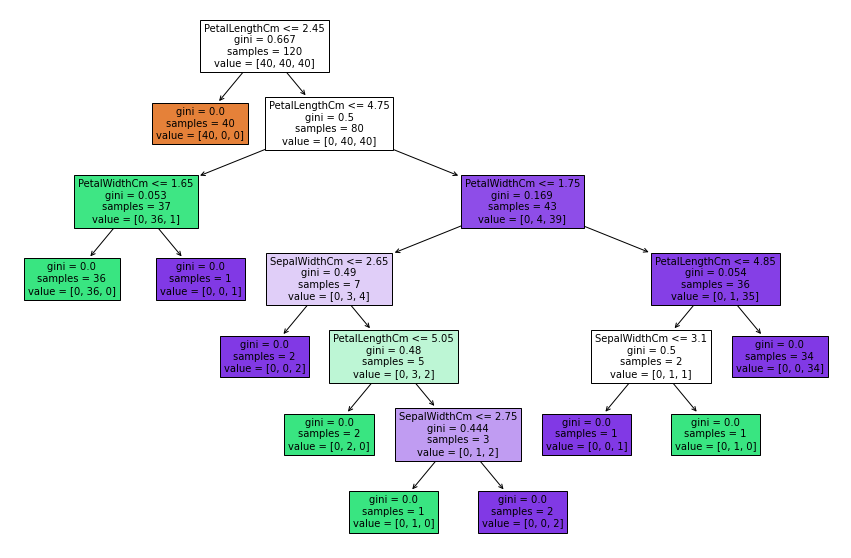

In [16]:
plt.figure(figsize = (15, 10))
_ = tree.plot_tree(model, filled = True, feature_names = df.columns)